Water Quality - Satyamedhas Pande

#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Exploration

##Feature Decription

1. ph: pH of 1. water (0 to 14).

2. Hardness: Capacity of water to precipitate soap in mg/L.

3. Solids: Total dissolved solids in ppm.

4. Chloramines: Amount of Chloramines in ppm.

5. Sulfate: Amount of Sulfates dissolved in mg/L.

6. Conductivity: Electrical conductivity of water in μS/cm.

7. Organic_carbon: Amount of organic carbon in ppm.

8. Trihalomethanes: Amount of Trihalomethanes in μg/L.

9. Turbidity: Measure of light emiting property of water in NTU.

10. Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [3]:
df = pd.read_csv('water_potability.csv')

In [4]:
feature_names = list(df.columns)
target_variable = 'Potability'  
feature_names.remove(target_variable)

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.shape

(3276, 10)

In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
#Filling the NaN values with the mean of the columns

df['ph'].fillna((df['ph'].mean()), inplace=True)

df['Sulfate'].fillna((df['Sulfate'].mean()), inplace=True)

df['Trihalomethanes'].fillna((df['Trihalomethanes'].mean()), inplace=True)


In [10]:
#Cross verifying the replacement of missing values

df.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

#Data Visualization

##Pie Chart for Water Potability

<Axes: ylabel='Potability'>

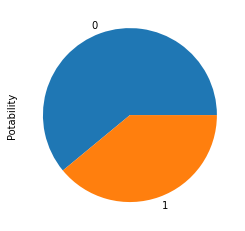

In [12]:
df.Potability.value_counts().plot(kind ='pie')

#As we can see in the below pie chart, potable water is less than the non-potable values.

##Box Plots

In [13]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<Axes: xlabel='Potability', ylabel='Turbidity'>

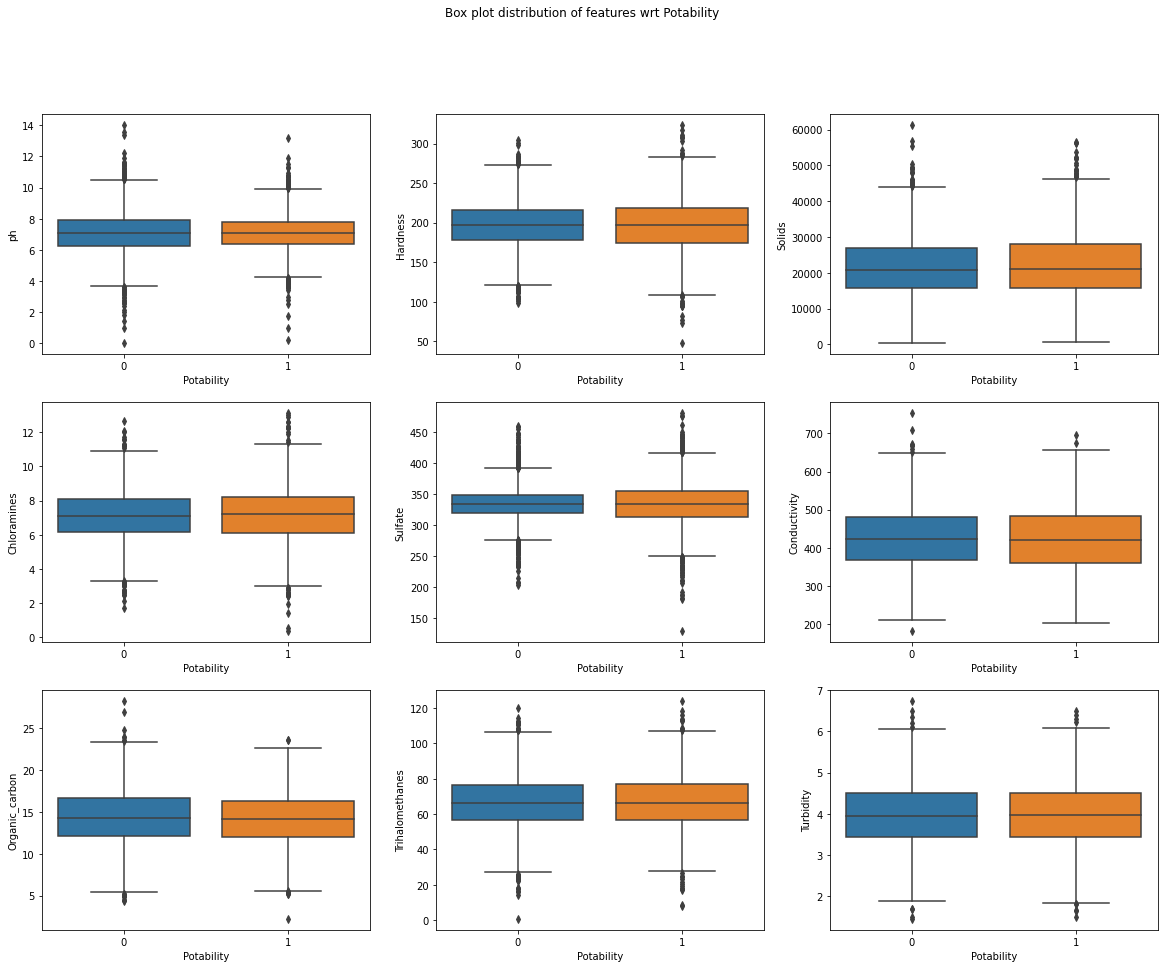

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

fig.suptitle('Box plot distribution of features wrt Potability')

sns.boxplot(ax=axes[0, 0], data=df, x='Potability', y='ph')
sns.boxplot(ax=axes[0, 1], data=df, x='Potability', y='Hardness')
sns.boxplot(ax=axes[0, 2], data=df, x='Potability', y='Solids')
sns.boxplot(ax=axes[1, 0], data=df, x='Potability', y='Chloramines')
sns.boxplot(ax=axes[1, 1], data=df, x='Potability', y='Sulfate')
sns.boxplot(ax=axes[1, 2], data=df, x='Potability', y='Conductivity')
sns.boxplot(ax=axes[2, 0], data=df, x='Potability', y='Organic_carbon')
sns.boxplot(ax=axes[2, 1], data=df, x='Potability', y='Trihalomethanes')
sns.boxplot(ax=axes[2, 2], data=df, x='Potability', y='Turbidity')

##Pairplot

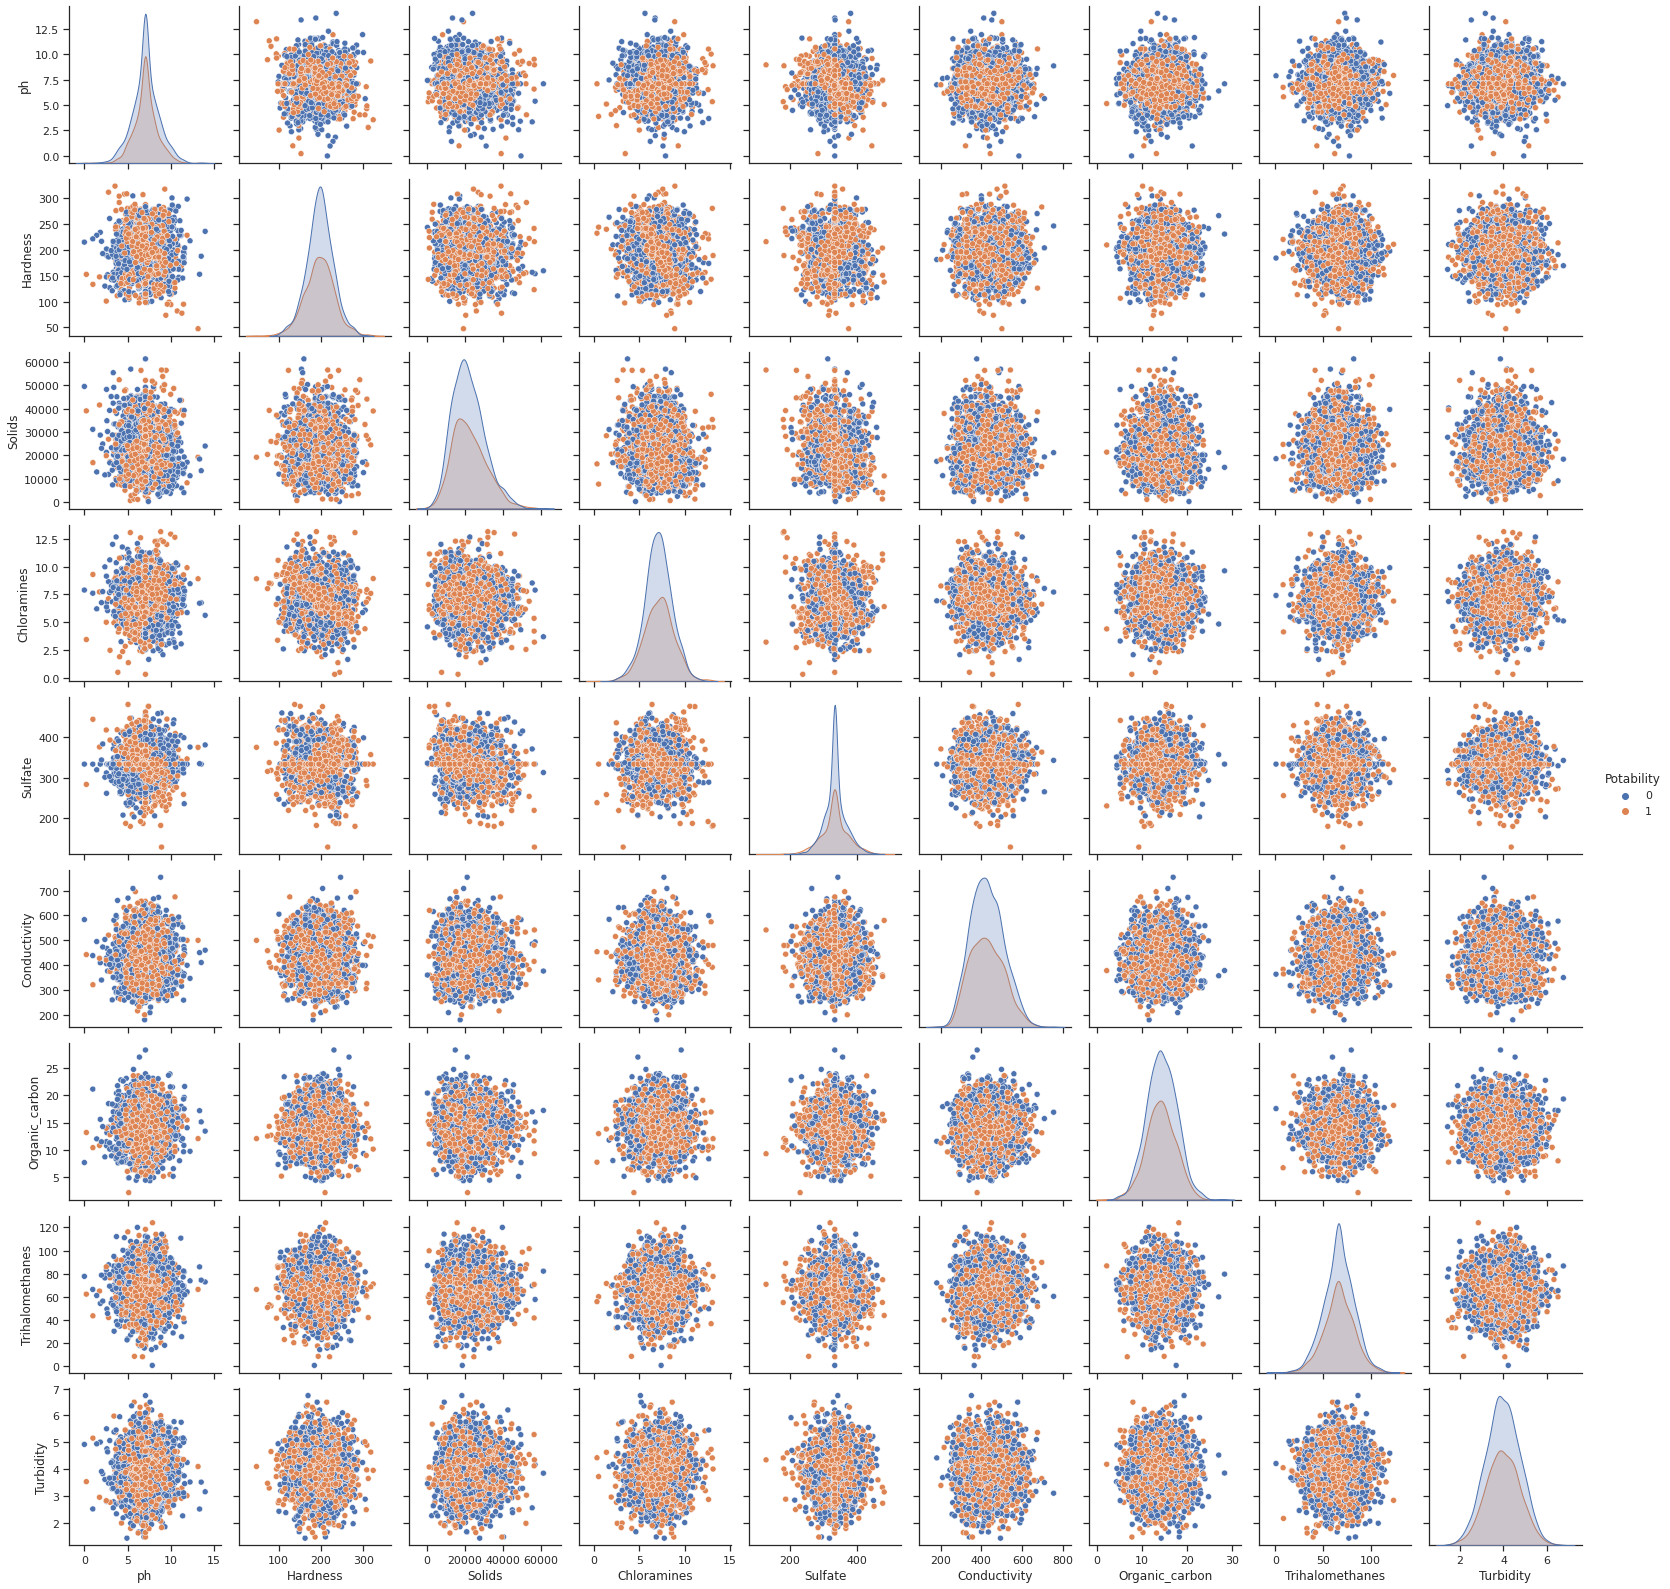

In [13]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue='Potability', kind='scatter')

##Heatmap

In [15]:
# Stats for the dataset
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
ph,3276.000000,7.080795,1.469956,0.000000,6.277673,7.080795,7.870050,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.000000,333.775777,36.142612,129.000000,317.094638,333.775777,350.385756,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.000000,66.396293,15.769881,0.738000,56.647656,66.396293,76.666609,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


<Axes: >

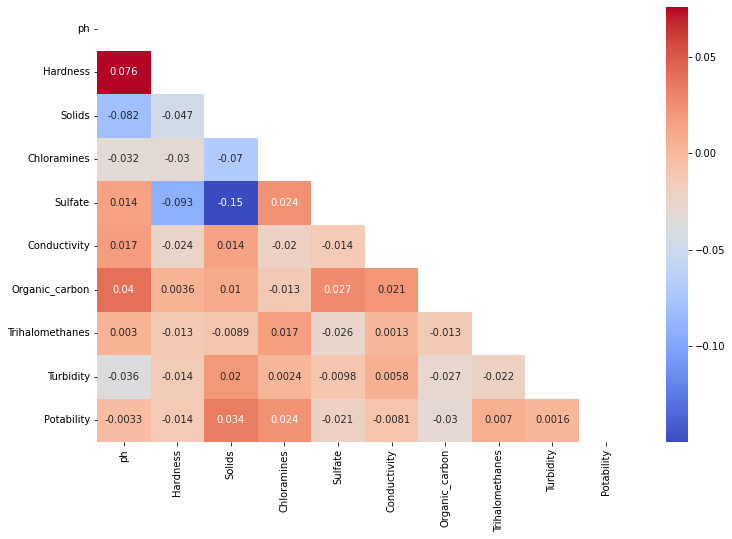

In [16]:
#correlation of features
df_corr = df.corr()

#masking the upper triangle in the heatmap as it contains the same values.
mask = np.triu(np.ones_like(df_corr, dtype=bool))
#Heatmap for correlation
plt.figure(figsize = (12,8))
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm',mask=mask)

#Data Preprocessing

##Splitting the dataset into test and training data

In [17]:
X=df.drop(['Potability'],axis=1).values
y=df['Potability'].values

In [18]:
#Splitting the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [19]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2457, 9)
X_test shape: (819, 9)
y_train shape: (2457,)
y_test shape: (819,)


##Scaling the data

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train #Confirming for scaled data

array([[-0.00600855,  0.18259841,  0.02138745, ..., -0.17061951,
        -0.14179194,  0.67463557],
       [-1.21225365,  0.23232669,  0.03650158, ..., -0.08624503,
         1.05077702, -1.32667001],
       [ 0.17864805, -0.0895905 ,  0.52718228, ...,  0.68862258,
        -0.33863813, -0.3749806 ],
       ...,
       [-0.3145389 , -0.29891649,  1.0017882 , ..., -0.13443849,
         1.27699875, -0.59844702],
       [ 1.16006163,  0.65360458, -0.66443153, ...,  0.63833668,
        -1.21809841,  0.41172033],
       [-0.26810493,  0.05213443,  1.42376121, ..., -0.63335828,
        -0.00394752, -0.25346199]])

In [22]:
X_test #Confirming for scaled data

array([[-0.00600855, -0.3976046 , -0.18138709, ...,  1.80248039,
         0.03529294,  1.20136351],
       [-0.30577482, -0.2333539 ,  1.22027016, ...,  0.1367896 ,
         0.08720236,  0.78309402],
       [ 0.51817199,  0.83715449,  0.13511836, ..., -0.2589401 ,
        -1.47142023, -1.89104327],
       ...,
       [-1.03866092,  0.99298849, -0.72884543, ..., -1.06704599,
        -0.16992874, -0.45787424],
       [ 1.05915297,  0.206724  , -0.94803563, ..., -0.57639516,
        -0.23034944,  0.57582233],
       [-0.25671871, -0.32486141,  1.41049732, ..., -1.22698285,
        -1.02221213,  0.94122432]])

#Building classifiers

##Modelling

In [23]:
def model_eval(model,x_test,y_test):
  from sklearn import metrics
  from sklearn.metrics import confusion_matrix

  #Run prediction on X_test
  y_pred = model.predict(X_test)

  #Calculation of accuracy, precision, recall, f-1score and classification report
  accuracy = 100*round(metrics.accuracy_score(y_test,y_pred),5)
  precision = 100*round(metrics.precision_score(y_test,y_pred),5)
  recall = 100*round(metrics.recall_score(y_test,y_pred),5)
  f1= 100*round(metrics.f1_score(y_test,y_pred),5)
  class_report = metrics.classification_report(y_test,y_pred)

  #Display Confusion Matrix
  cm=confusion_matrix(y_test,y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      cm.flatten()/np.sum(cm)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.title('Logistic Regression Model-Confusion Matrix')

  sns.heatmap(cm, annot=labels, fmt='', cmap='crest',annot_kws={"size":12},cbar=False)
  plt.ylabel("Actual Values")
  plt.xlabel("Predicted Values")
  plt.savefig('confusion_matrix.png')

  #Return values
  return {'Accuracy':accuracy,'Precision':precision,'Recall':recall,'f-1 score':f1,'classification_report':class_report}

##Logistic Regression Model

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: Undefine

Accuracy: 62.27 %
Precision: 0.0 %
Recall: 0.0 %
F1 Score: 0.0 %
Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77       510
           1       0.00      0.00      0.00       309

    accuracy                           0.62       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.39      0.62      0.48       819



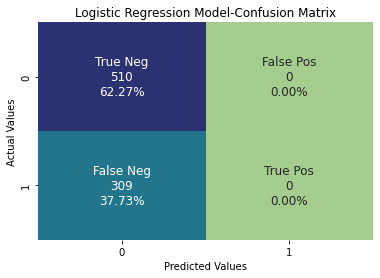

In [24]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

#Evaluate model
log_eval = model_eval(logmodel,X_test,y_test)

#Print scores
print('Accuracy:', "{:.2f}".format(log_eval['Accuracy']),'%')
print('Precision:', log_eval['Precision'],'%')
print('Recall:', log_eval['Recall'],'%')
print('F1 Score:', log_eval['f-1 score'],'%')
print('Classification Report:\n', log_eval['classification_report'])

##KNN model

Accuracy: 62.759 %
Precision: 50.82 %
Recall: 40.13 %
F1 Score: 44.846000000000004 %
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72       510
           1       0.51      0.40      0.45       309

    accuracy                           0.63       819
   macro avg       0.59      0.58      0.58       819
weighted avg       0.61      0.63      0.62       819



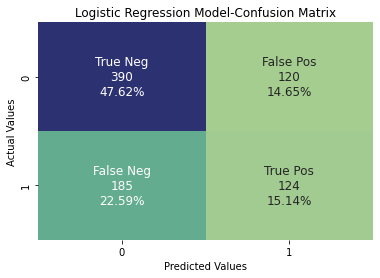

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

#Evaluate model
knn_eval = model_eval(knn,X_test,y_test)

#Print scores
print('Accuracy:', knn_eval['Accuracy'],'%')
print('Precision:', knn_eval['Precision'],'%')
print('Recall:',"{:.2f}".format( knn_eval['Recall']),'%')
print('F1 Score:', knn_eval['f-1 score'],'%')
print('Classification Report:\n', knn_eval['classification_report'])

##Decision Tree

Accuracy: 59.096000000000004 %
Precision: 46.348 %
Recall: 53.398 %
F1 Score: 49.624 %
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       510
           1       0.46      0.53      0.50       309

    accuracy                           0.59       819
   macro avg       0.58      0.58      0.58       819
weighted avg       0.60      0.59      0.60       819



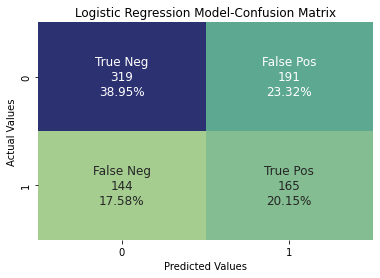

In [26]:
from sklearn .tree import DecisionTreeClassifier


# Building Decision Tree model 
clf =DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train, y_train)


#Evaluate model
clf_eval = model_eval(clf,X_test,y_test)

#Print scores
print('Accuracy:', clf_eval['Accuracy'],'%')
print('Precision:', clf_eval['Precision'],'%')
print('Recall:', clf_eval['Recall'],'%')
print('F1 Score:', clf_eval['f-1 score'],'%')
print('Classification Report:\n', clf_eval['classification_report'])

##Random Forest

Accuracy: 69.719 %
Precision: 68.485 %
Recall: 36.57 %
F1 Score: 47.679 %
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79       510
           1       0.68      0.37      0.48       309

    accuracy                           0.70       819
   macro avg       0.69      0.63      0.63       819
weighted avg       0.69      0.70      0.67       819



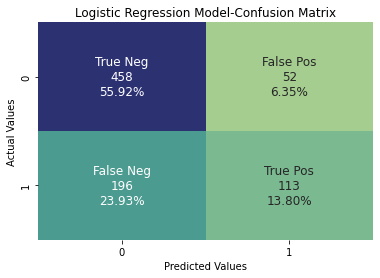

In [27]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(criterion='gini', random_state=0)
rclf.feature_names = feature_names

rclf.fit(X_train,y_train)

#Evaluate model
rclf_eval = model_eval(rclf,X_test,y_test)

#Print scores
print('Accuracy:', rclf_eval['Accuracy'],'%')
print('Precision:', rclf_eval['Precision'],'%')
print('Recall:', rclf_eval['Recall'],'%')
print('F1 Score:', rclf_eval['f-1 score'],'%')
print('Classification Report:\n', rclf_eval['classification_report'])

##Naive Bayes

Accuracy: 63.61 %
Precision: 54.545 %
Recall: 21.359 %
F1 Score: 30.697999999999997 %
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.89      0.75       510
           1       0.55      0.21      0.31       309

    accuracy                           0.64       819
   macro avg       0.60      0.55      0.53       819
weighted avg       0.61      0.64      0.58       819



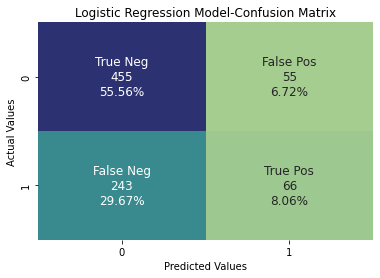

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train,y_train)

#Evaluate model
gnb_eval = model_eval(gnb,X_test,y_test)

#Print scores
print('Accuracy:', "{:.2f}".format(gnb_eval['Accuracy']),'%')
print('Precision:', gnb_eval['Precision'],'%')
print('Recall:', gnb_eval['Recall'],'%')
print('F1 Score:', gnb_eval['f-1 score'],'%')
print('Classification Report:\n', gnb_eval['classification_report'])

##Artificial Neural Nets

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Shell for ANN
nn_model = Sequential()

#Creating 1st layer
nn_model.add(Dense(6, activation = 'relu'))

#Creating 2nd layer
nn_model.add(Dense(4, activation = 'relu'))

#Creating 3rd layer
nn_model.add(Dense(2, activation = 'relu'))

#Creating output layer
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy')

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode='min',verbose=1, patience = 25)

nn_model.fit(x = X_train, y=y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
39/39 [==============================] - 6s 9ms/step - loss: 0.7684 - val_loss: 0.7275
Epoch 2/500
39/39 [==============================] - 0s 4ms/step - loss: 0.7105 - val_loss: 0.6936
Epoch 3/500
39/39 [==============================] - 0s 4ms/step - loss: 0.6919 - val_loss: 0.6810
Epoch 4/500
39/39 [==============================] - 0s 4ms/step - loss: 0.6835 - val_loss: 0.6751
Epoch 5/500
39/39 [==============================] - 0s 4ms/step - loss: 0.6794 - val_loss: 0.6716
Epoch 6/500
39/39 [==============================] - 0s 4ms/step - loss: 0.6770 - val_loss: 0.6694
Epoch 7/500
39/39 [==============================] - 0s 5ms/step - loss: 0.6755 - val_loss: 0.6680
Epoch 8/500
39/39 [==============================] - 0s 5ms/step - loss: 0.6741 - val_loss: 0.6667
Epoch 9/500
39/39 [==============================] - 0s 4ms/step - loss: 0.6730 - val_loss: 0.6660
Epoch 10/500
39/39 [==============================] - 0s 4ms/step - loss: 0.6720 - val_loss: 0.6649
Epoch 11/

In [29]:
y_pred = nn_model.predict(X_test)

26/26 [==============================] - 0s 1ms/step


In [30]:
y_pred = (y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score,precision_score
cm_ann = confusion_matrix(y_test,y_pred)
print(cm_ann)

accuracy_ann = 100*round(accuracy_score(y_test,y_pred),5)
print('Accuracy:',accuracy_ann)

recall_ann = 100*round(recall_score(y_test,y_pred),5)
print('recall score:',recall_ann)

f1_ann = 100*round(f1_score(y_test,y_pred),5)
print('f1-score is:',f1_ann)

precision_ann = 100*round(precision_score(y_test, y_pred),5)
print('Precision:', precision_ann)

cr_ann = classification_report(y_test,y_pred)
print(cr_ann)

[[477  33]
 [252  57]]
Accuracy: 65.201
recall score: 18.447
f1-score is: 28.571
Precision: 63.333
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       510
           1       0.63      0.18      0.29       309

    accuracy                           0.65       819
   macro avg       0.64      0.56      0.53       819
weighted avg       0.65      0.65      0.59       819



#Model Comparison

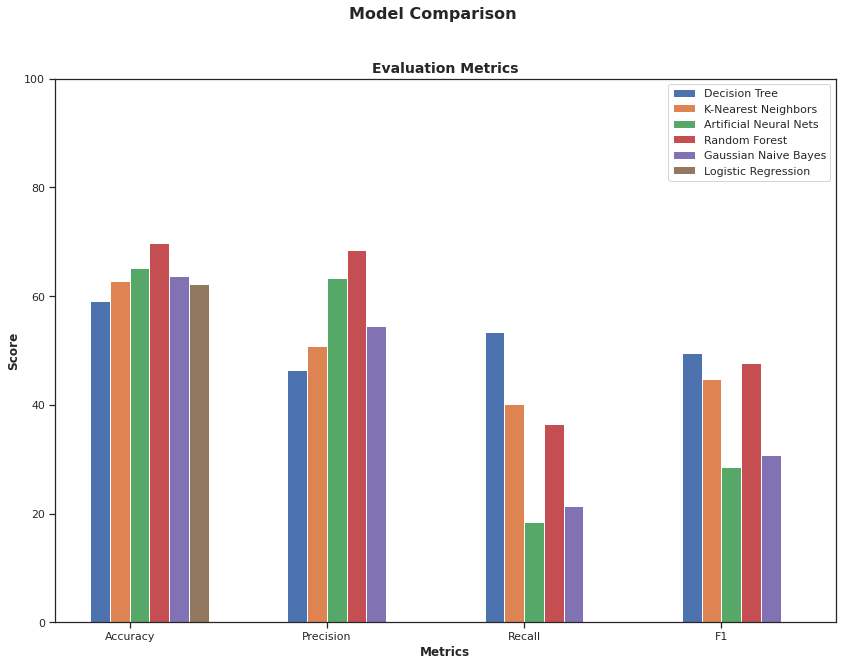

In [32]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(10)
fig.set_figwidth(14)
fig.set_facecolor('white')

## set bar size
barWidth = 0.1
logmodel_score=[log_eval['Accuracy'], log_eval['Precision'], log_eval['Recall'], log_eval['f-1 score']]
clf_score = [clf_eval['Accuracy'], clf_eval['Precision'], clf_eval['Recall'], clf_eval['f-1 score']]
knn_score = [knn_eval['Accuracy'], knn_eval['Precision'], knn_eval['Recall'], knn_eval['f-1 score']]
rclf_score = [rclf_eval['Accuracy'],rclf_eval['Precision'], rclf_eval['Recall'], rclf_eval['f-1 score']]
gnb_score = [gnb_eval['Accuracy'],gnb_eval['Precision'], gnb_eval['Recall'], gnb_eval['f-1 score']]
ann_score = [accuracy_ann, precision_ann, recall_ann, f1_ann ]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1,clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2,knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3,ann_score, width=barWidth, edgecolor='white', label='Artificial Neural Nets')
ax1.bar(r4,rclf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5,gnb_score, width=barWidth, edgecolor='white', label='Gaussian Naive Bayes')
ax1.bar(r6,logmodel_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 100)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

#Cross Validation with GridSearch CV

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [34]:
#Initialze the estimators
clf1 = RandomForestClassifier(criterion='gini', random_state=42)

In [35]:
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20,None]
param1['classifier'] = [clf1]

pipeline = Pipeline([('classifier', clf1)])
params = [param1]

In [36]:
gs = GridSearchCV(pipeline, params, cv=10,n_jobs=-1, scoring='accuracy')

In [37]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(max_depth=20,
                                                               n_estimators=250,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(max_depth=20,
                                                                n_estimators=250,
                                                                random_state=42)],
                          'classifier__max_depth': [5, 10, 20, None],
                          'classifier__n_estimators': [10, 50, 100, 250]}],
             scoring='accuracy')

In [38]:
print(gs.best_params_)
print(gs.best_score_)

{'classifier': RandomForestClassifier(max_depth=20, n_estimators=250, random_state=42), 'classifier__max_depth': 20, 'classifier__n_estimators': 250}
0.6719661523145843


In [39]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054105,0.003887,0.002583,0.000465,"RandomForestClassifier(max_depth=20, n_estimat...",5,10,{'classifier': RandomForestClassifier(max_dept...,0.613821,0.621951,...,0.609756,0.613821,0.638211,0.654472,0.657143,0.648980,0.636735,0.634530,0.017372,15
1,0.255446,0.012132,0.008183,0.000447,"RandomForestClassifier(max_depth=20, n_estimat...",5,50,{'classifier': RandomForestClassifier(max_dept...,0.634146,0.626016,...,0.630081,0.609756,0.621951,0.646341,0.677551,0.661224,0.636735,0.639827,0.019207,10
2,0.527850,0.033009,0.018433,0.003237,"RandomForestClassifier(max_depth=20, n_estimat...",5,100,{'classifier': RandomForestClassifier(max_dept...,0.642276,0.621951,...,0.638211,0.621951,0.617886,0.650407,0.673469,0.644898,0.636735,0.638600,0.015478,12
3,1.512423,0.459107,0.040191,0.005121,"RandomForestClassifier(max_depth=20, n_estimat...",5,250,{'classifier': RandomForestClassifier(max_dept...,0.638211,0.621951,...,0.634146,0.609756,0.617886,0.658537,0.673469,0.640816,0.636735,0.638191,0.018214,13
4,0.077978,0.001790,0.002529,0.000144,"RandomForestClassifier(max_depth=20, n_estimat...",10,10,{'classifier': RandomForestClassifier(max_dept...,0.646341,0.646341,...,0.630081,0.609756,0.626016,0.581301,0.657143,0.665306,0.640816,0.635351,0.023583,14
5,0.375575,0.006763,0.009671,0.001374,"RandomForestClassifier(max_depth=20, n_estimat...",10,50,{'classifier': RandomForestClassifier(max_dept...,0.646341,0.638211,...,0.638211,0.650407,0.654472,0.646341,0.685714,0.702041,0.653061,0.659773,0.021088,7
6,0.974633,0.281152,0.026056,0.007916,"RandomForestClassifier(max_depth=20, n_estimat...",10,100,{'classifier': RandomForestClassifier(max_dept...,0.662602,0.654472,...,0.642276,0.654472,0.646341,0.666667,0.681633,0.689796,0.644898,0.662608,0.016293,4
7,1.868260,0.021314,0.041382,0.002917,"RandomForestClassifier(max_depth=20, n_estimat...",10,250,{'classifier': RandomForestClassifier(max_dept...,0.658537,0.654472,...,0.650407,0.646341,0.646341,0.662602,0.661224,0.693878,0.648980,0.658945,0.013448,8
8,0.098946,0.003310,0.002687,0.000136,"RandomForestClassifier(max_depth=20, n_estimat...",20,10,{'classifier': RandomForestClassifier(max_dept...,0.621951,0.638211,...,0.634146,0.621951,0.597561,0.613821,0.644898,0.669388,0.604082,0.629642,0.020949,16
9,0.719558,0.169290,0.012421,0.003763,"RandomForestClassifier(max_depth=20, n_estimat...",20,50,{'classifier': RandomForestClassifier(max_dept...,0.650407,0.646341,...,0.634146,0.662602,0.650407,0.662602,0.669388,0.697959,0.644898,0.660574,0.018801,5


In [40]:
final_clf=gs.best_estimator_


In [41]:
final_clf.score(X_test,y_test)

0.684981684981685

#Deployment

In [54]:
import joblib

In [55]:
joblib.dump(rclf, 'water_potability.joblib')

['water_potability.joblib']